In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

These datasets were prepared in another notebook for simplicity purposes. More about the dataset on this notebook link: [Dataset Preparation Notebook](https://colab.research.google.com/drive/1L1sX-3cYew_iYlyuD9maQ5u_DhDBP9mx?usp=sharing)

In [ ]:
df_w1 = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w1_model_train.csv")
df_w2 = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w2_model_train.csv")
df_w3 = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w3_model_train.csv")
df_w4 = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w4_model_train.csv")
df_w5 = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w5_model_train.csv")
df_validation = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w6_model_validation.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Studi Independen/FP/FP - Window Dataset/df_features_w7_model_predict.csv")

In [ ]:
dfs = [df_w1, df_w2, df_w3, df_w4, df_w5, df_validation, df_test]
for i in dfs :
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26204 entries, 0 to 26203
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     26204 non-null  int64  
 1   customer_age_years              26204 non-null  int64  
 2   account_age_months              26204 non-null  int64  
 3   gender_female                   26204 non-null  int64  
 4   gender_male                     26204 non-null  int64  
 5   event_total                     26204 non-null  int64  
 6   event_add_promo_total           26204 non-null  int64  
 7   event_add_to_cart_total         26204 non-null  int64  
 8   event_booking_total             26204 non-null  int64  
 9   event_click_total               26204 non-null  int64  
 10  event_homepage_total            26204 non-null  float64
 11  event_item_detail_total         26204 non-null  int64  
 12  event_promo_page_total          

Unify all train datasets.

In [ ]:
df_train = pd.concat([df_w1, df_w2, df_w3, df_w4, df_w5], ignore_index=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144146 entries, 0 to 144145
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     144146 non-null  int64  
 1   customer_age_years              144146 non-null  int64  
 2   account_age_months              144146 non-null  int64  
 3   gender_female                   144146 non-null  int64  
 4   gender_male                     144146 non-null  int64  
 5   event_total                     144146 non-null  int64  
 6   event_add_promo_total           144146 non-null  int64  
 7   event_add_to_cart_total         144146 non-null  int64  
 8   event_booking_total             144146 non-null  int64  
 9   event_click_total               144146 non-null  int64  
 10  event_homepage_total            144146 non-null  float64
 11  event_item_detail_total         144146 non-null  int64  
 12  event_promo_page

In [ ]:
df_train.sample(5)

,customer_id,customer_age_years,account_age_months,gender_female,gender_male,event_total,event_add_promo_total,event_add_to_cart_total,event_booking_total,event_click_total,...,payment_linkaja_total,payment_ovo_total,payment_failed_total,payment_success_total,session_duration_minutes_total,session_duration_minutes_avg,using_mobile_total,using_web_total,transaction_recency_days,is_churn
54488,1212,32,45,1,0,1,0,0,1,0,...,0,0,0,1,0,0.0,1,0,135,1
37448,39703,24,40,0,1,23,1,3,2,6,...,1,0,0,2,7415,3707.5,2,0,97,0
137085,77251,34,22,1,0,61,1,15,5,10,...,0,0,0,5,52468,10493.6,4,1,70,0
35349,32248,32,26,0,1,152,1,7,6,39,...,0,5,0,6,54774,9129.0,6,0,69,0
1671,6102,22,37,1,0,16,1,3,2,4,...,0,0,0,2,30533,15266.5,2,0,68,1


# Drop Unwanted Column

Make customer_id df for prediction purpose later.

In [ ]:
df_test_cust_id = pd.DataFrame(df_test['customer_id'])

In [ ]:
type(df_test_cust_id)

pandas.core.frame.DataFrame

In [ ]:
df_test_cust_id.head()

,customer_id
0,3
1,18
2,20
3,24
4,28


In [ ]:
df_train.drop(columns=['customer_id'], inplace=True)
df_validation.drop(columns=['customer_id'], inplace=True)
df_test.drop(columns=['customer_id'], inplace=True)

In [ ]:
dfs = [df_train, df_validation, df_test]
for i in dfs :
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144146 entries, 0 to 144145
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_age_years              144146 non-null  int64  
 1   account_age_months              144146 non-null  int64  
 2   gender_female                   144146 non-null  int64  
 3   gender_male                     144146 non-null  int64  
 4   event_total                     144146 non-null  int64  
 5   event_add_promo_total           144146 non-null  int64  
 6   event_add_to_cart_total         144146 non-null  int64  
 7   event_booking_total             144146 non-null  int64  
 8   event_click_total               144146 non-null  int64  
 9   event_homepage_total            144146 non-null  float64
 10  event_item_detail_total         144146 non-null  int64  
 11  event_promo_page_total          144146 non-null  int64  
 12  event_scroll_tot

# Data Scalling

Separate label from df_train and df_validation so the scaler can also scale the df_test.

In [ ]:
# separate label from features (train)
df_train_label = df_train['is_churn']
df_train.drop(columns=['is_churn'], inplace=True)
# separate label from features (validation)
df_validation_label = df_validation['is_churn']
df_validation.drop(columns=['is_churn'], inplace=True)

In [ ]:
# scale dataset (train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
df_train_scaled = pd.DataFrame(df_train_scaled, columns= df_train.columns)
# scale dataset (validation)
df_validation_scaled = scaler.transform(df_validation)
df_validation_scaled = pd.DataFrame(df_validation_scaled, columns= df_validation.columns)
# scale dataset (test)
df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns= df_test.columns)

In [ ]:
df_train_scaled.sample(5)

,customer_age_years,account_age_months,gender_female,gender_male,event_total,event_add_promo_total,event_add_to_cart_total,event_booking_total,event_click_total,event_homepage_total,...,payment_gopay_total,payment_linkaja_total,payment_ovo_total,payment_failed_total,payment_success_total,session_duration_minutes_total,session_duration_minutes_avg,using_mobile_total,using_web_total,transaction_recency_days
116116,0.241935,0.507246,1.0,0.0,0.009883,0.000000,0.017241,0.016393,0.007843,0.004425,...,0.00,0.0,0.0,0.0,0.032787,0.143125,0.071562,0.034483,0.0,0.274194
79524,0.209677,0.144928,0.0,1.0,0.008985,0.037037,0.008621,0.000000,0.007843,0.002212,...,0.00,0.0,0.0,0.0,0.016393,0.171292,0.171292,0.017241,0.0,0.467742
11419,0.225806,0.333333,1.0,0.0,0.020665,0.000000,0.025862,0.016393,0.011765,0.011062,...,0.00,0.0,0.0,0.0,0.032787,0.340813,0.170406,0.034483,0.0,0.225806
130350,0.322581,0.753623,1.0,0.0,0.017071,0.037037,0.064655,0.000000,0.000000,0.004425,...,0.00,0.0,0.0,0.0,0.016393,0.758008,0.758008,0.017241,0.0,0.169355
126873,0.403226,0.028986,0.0,1.0,0.203953,0.148148,0.081897,0.147541,0.188235,0.086283,...,0.25,0.0,0.0,0.0,0.163934,0.209180,0.020918,0.155172,0.1,0.040323


In [ ]:
df_validation_scaled.sample(5)

,customer_age_years,account_age_months,gender_female,gender_male,event_total,event_add_promo_total,event_add_to_cart_total,event_booking_total,event_click_total,event_homepage_total,...,payment_gopay_total,payment_linkaja_total,payment_ovo_total,payment_failed_total,payment_success_total,session_duration_minutes_total,session_duration_minutes_avg,using_mobile_total,using_web_total,transaction_recency_days
18062,0.338710,0.304348,1.0,0.0,0.000898,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.016393,0.181296,0.181296,0.017241,0.0,0.766129
26107,0.370968,0.101449,1.0,0.0,0.004492,0.037037,0.004310,0.016393,0.000000,0.002212,...,0.0,0.000000,0.000000,0.0,0.032787,0.019531,0.009766,0.017241,0.1,0.451613
9558,0.354839,0.028986,1.0,0.0,0.024259,0.000000,0.021552,0.016393,0.023529,0.013274,...,0.0,0.000000,0.000000,0.0,0.032787,0.008982,0.004491,0.034483,0.0,0.467742
5263,0.258065,0.260870,0.0,1.0,0.066487,0.037037,0.017241,0.065574,0.062745,0.022124,...,0.0,0.037037,0.086957,0.0,0.081967,0.406788,0.081358,0.086207,0.0,0.112903
231,0.306452,0.072464,1.0,0.0,0.094340,0.000000,0.047414,0.114754,0.086275,0.048673,...,0.0,0.037037,0.000000,0.0,0.131148,0.316484,0.039560,0.120690,0.1,0.080645


In [ ]:
df_test_scaled.sample(5)

,customer_age_years,account_age_months,gender_female,gender_male,event_total,event_add_promo_total,event_add_to_cart_total,event_booking_total,event_click_total,event_homepage_total,...,payment_gopay_total,payment_linkaja_total,payment_ovo_total,payment_failed_total,payment_success_total,session_duration_minutes_total,session_duration_minutes_avg,using_mobile_total,using_web_total,transaction_recency_days
8082,0.370968,0.115942,0.0,1.0,0.004492,0.000000,0.004310,0.000000,0.003922,0.002212,...,0.000,0.0,0.000000,0.0,0.016393,0.158500,0.158500,0.017241,0.0,-0.137097
3707,0.387097,0.768116,0.0,1.0,0.021563,0.074074,0.008621,0.016393,0.011765,0.008850,...,0.000,0.0,0.000000,0.0,0.032787,0.058566,0.029283,0.034483,0.0,-0.435484
11239,0.290323,0.028986,0.0,1.0,0.010782,0.000000,0.008621,0.000000,0.015686,0.004425,...,0.000,0.0,0.000000,0.0,0.016393,0.005661,0.005661,0.017241,0.0,-0.177419
9986,0.225806,0.637681,0.0,1.0,0.011680,0.000000,0.008621,0.016393,0.011765,0.004425,...,0.000,0.0,0.043478,0.0,0.032787,0.267615,0.133808,0.034483,0.0,-0.346774
7235,0.258065,0.391304,1.0,0.0,0.013477,0.000000,0.004310,0.000000,0.015686,0.002212,...,0.025,0.0,0.000000,0.0,0.016393,0.073572,0.073572,0.017241,0.0,-0.233871


# Balancing

To make more stable and unbias model, df_train need to be balanced.

In [ ]:
X = df_train_scaled
y = df_train_label

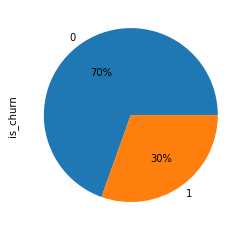

In [ ]:
y.value_counts().plot(kind='pie', label= 'is_churn', autopct='%.0f%%')

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 100226, 1: 43920})
Resampled dataset shape Counter({0: 100226, 1: 100226})


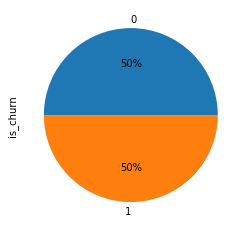

In [ ]:
y_res.value_counts().plot(kind='pie', label= 'is_churn', autopct='%.0f%%')

In [ ]:
# split train dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=0)

# Coba Drop Recency

In our invistigation, we found that the recency feature is kinda problematic. We decide that it's better to just drop it.

In [ ]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200452 entries, 0 to 200451
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_age_years              200452 non-null  float64
 1   account_age_months              200452 non-null  float64
 2   gender_female                   200452 non-null  float64
 3   gender_male                     200452 non-null  float64
 4   event_total                     200452 non-null  float64
 5   event_add_promo_total           200452 non-null  float64
 6   event_add_to_cart_total         200452 non-null  float64
 7   event_booking_total             200452 non-null  float64
 8   event_click_total               200452 non-null  float64
 9   event_homepage_total            200452 non-null  float64
 10  event_item_detail_total         200452 non-null  float64
 11  event_promo_page_total          200452 non-null  float64
 12  event_scroll_tot

In [ ]:
X_res_drop_recency = X_res.drop(columns='transaction_recency_days')

In [ ]:
X_res_drop_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200452 entries, 0 to 200451
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_age_years              200452 non-null  float64
 1   account_age_months              200452 non-null  float64
 2   gender_female                   200452 non-null  float64
 3   gender_male                     200452 non-null  float64
 4   event_total                     200452 non-null  float64
 5   event_add_promo_total           200452 non-null  float64
 6   event_add_to_cart_total         200452 non-null  float64
 7   event_booking_total             200452 non-null  float64
 8   event_click_total               200452 non-null  float64
 9   event_homepage_total            200452 non-null  float64
 10  event_item_detail_total         200452 non-null  float64
 11  event_promo_page_total          200452 non-null  float64
 12  event_scroll_tot

In [ ]:
# split train dataset
from sklearn.model_selection import train_test_split

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_res_drop_recency, y_res, test_size=0.33, random_state=0)

# Model Selection

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# Import semua model yang akan dibandingkan

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier


model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Classifier':RidgeClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=42),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=42),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'Catboost Classifier':CatBoostClassifier(random_state=42, silent=True),
}

In [ ]:
# Import seluruh metrics akurasi

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer


In [ ]:
# Membuat function untuk menampilkan semua model yang dibandingkan
# beserta nilai akurasi metriknya (accuracy, precision, recall, f1, roc_auc)

def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [ ]:
y_pred_list_2 = dict()

for name, model in model_list.items():
  model.fit(X_train_drop, y_train_drop)
  y_pred_list_2[name] = model.predict(X_test_drop)

score = get_score(y_pred_list_2, y_test_drop, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.838352,0.843832,0.838278,0.837684,0.838278
Ridge Classifier,0.807952,0.826102,0.807812,0.805193,0.807812
KNN,0.824732,0.840709,0.824604,0.822613,0.824604
SVC,0.838352,0.844257,0.838275,0.837634,0.838275
Neural Network,0.848088,0.859789,0.847981,0.846814,0.847981
Decision Tree,0.826818,0.826820,0.826816,0.826817,0.826816
Gradient Boosting Classifier,0.866168,0.877102,0.866067,0.865168,0.866067
AdaBoost Classifier,0.857763,0.867233,0.857668,0.856817,0.857668
Hist Gradient Boosting,0.867438,0.876481,0.867346,0.866616,0.867346


# LGBM

From the table above, we can see the best performing model is using LightGBM Classifier Algorithm. Hence, we'll use LGBMClassifier from this point forward.

## LGBMClassifier Baseline Model

In [ ]:
from lightgbm import LGBMClassifier
modelLGBM = LGBMClassifier(random_state=42)
modelLGBM.fit(X_train_drop, y_train_drop)
modelLGBM.score(X_test_drop, y_test_drop)

0.868193499622071

To see the most important features, we plot the feature importance. From the plot below, we can see the top 10 features are dominated by features derived from the clickstream datasets, except the first feature, account_age_months, that derived from customer datasets.

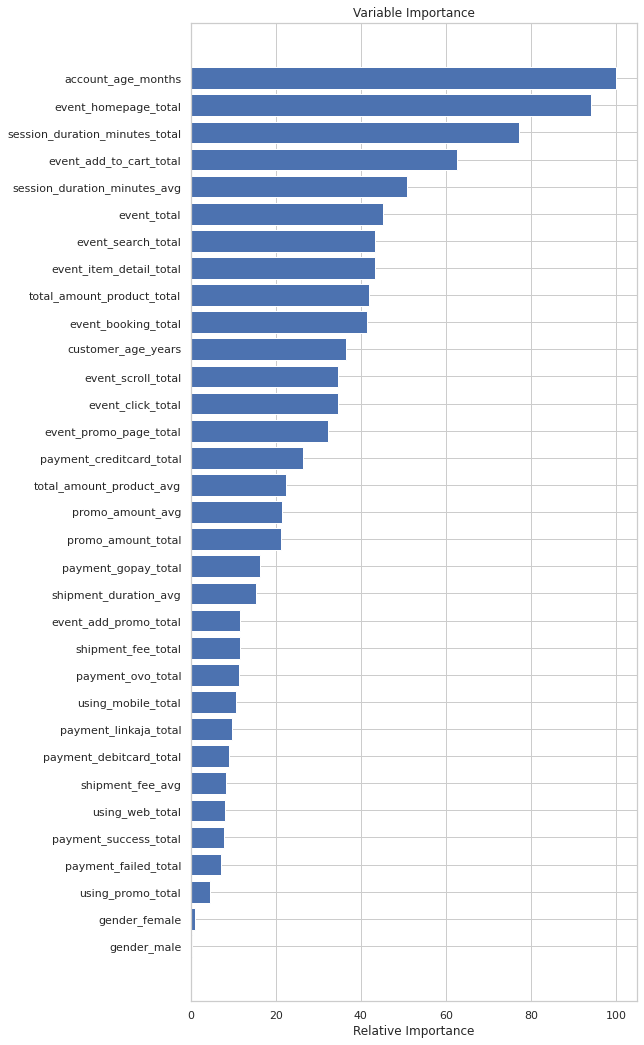

In [ ]:
# Plot feature importance
feature_importance = modelLGBM.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_drop.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Evaluate Using Validation Set

In [ ]:
df_validation_scaled_drop = df_validation_scaled.drop(columns='transaction_recency_days')

In [ ]:
# evaluasi

validation_predict_lgbm = modelLGBM.predict(df_validation_scaled_drop)

print('Akurasi model ini adalah: ', metrics.accuracy_score(df_validation_label, validation_predict_lgbm))

Akurasi model ini adalah:  0.797372392974753


## LGBM PCA

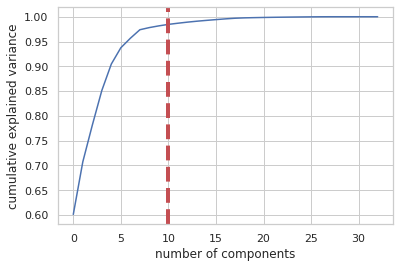

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.601273,0.601273
1,0.707303,0.106030
2,0.781339,0.074036
3,0.851280,0.069941
4,0.904689,0.053409
5,0.937477,0.032788
6,0.956626,0.019149
7,0.973787,0.017161
8,0.978156,0.004369
9,0.981620,0.003464


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=33)
pca_test.fit(X_train_drop)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

From the dataframe above, we can see with only 10 components, it still can explain over 95% of the variance. The other 23 components explain less than 5% of the variance, thus we can cut them. Hence, we'll use PCA to reduce the number of components from 33 to 10 for X_train_drop and X_test_drop and assign this “reduced dimension” datasets to X_train_drop_pca and X_test_drop_pca.

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train_drop)
X_train_drop_pca = pca.transform(X_train_drop)
X_test_drop_pca = pca.transform(X_test_drop)

In [ ]:
from lightgbm import LGBMClassifier
modelLGBM_pca = LGBMClassifier(random_state=42)
modelLGBM_pca.fit(X_train_drop_pca, y_train_drop)
modelLGBM_pca.score(X_test_drop_pca, y_test_drop)

0.842660619803477

We can see above, the accuracy from the model that uses the new reduced dataset is decreased. However, we'll still try to evaluate this model to the validation set and check whether the result will turn out well or not.

AttributeError: ignored

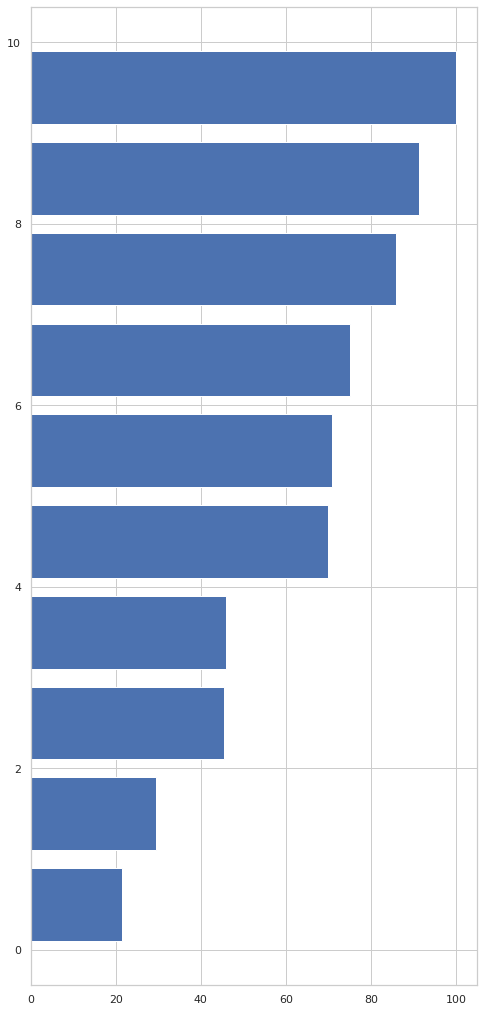

In [ ]:
# Plot feature importance
feature_importance = modelLGBM_pca.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_drop_pca.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Evaluate Using Validation Set PCA

In [ ]:
df_validation_scaled_drop_pca = pca.transform(df_validation_scaled_drop)

In [ ]:
# evaluasi

validation_predict_lgbm_pca = modelLGBM_pca.predict(df_validation_scaled_drop_pca)

print('Akurasi model ini adalah: ', metrics.accuracy_score(df_validation_label, validation_predict_lgbm_pca))

Akurasi model ini adalah:  0.8250548847420417


We can see above, although the new model's accuracy is decreased, when we try to evaluate it with the validation set, it performs rather well than the old model. This indicates that the new model is more stable than the old one.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


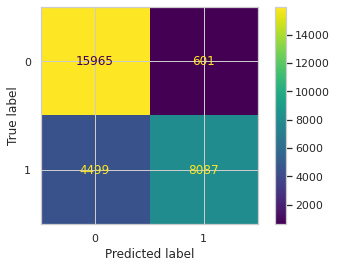

In [ ]:
print(metrics.plot_confusion_matrix(modelLGBM_pca, df_validation_scaled_drop_pca, df_validation_label))

In [ ]:
print(metrics.classification_report(df_validation_label, validation_predict_lgbm_pca))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     16566
           1       0.93      0.64      0.76     12586

    accuracy                           0.83     29152
   macro avg       0.86      0.80      0.81     29152
weighted avg       0.85      0.83      0.82     29152



# Hyperparamater Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
num_leaves = [int(x) for x in np.linspace(start = 20, stop = 3000, num = 10)]
learning_rate = [float(x) for x in np.linspace(start = 0.01, stop = 0.3, num = 10)]
max_depth = [int(x) for x in np.linspace(start = 3, stop = 12, num = 4)]
min_split_gain = [int(x) for x in np.linspace(start = 0, stop = 5, num = 3)]
reg_alpha = [int(x) for x in np.linspace(start = 0, stop = 100, num = 5)]
reg_lambda = [int(x) for x in np.linspace(start = 0, stop = 100, num = 5)]
param_dist = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'num_leaves': num_leaves,
               'max_depth': max_depth,
               'min_split_gain': min_split_gain,
               'reg_alpha': reg_alpha,
               'reg_lambda': reg_lambda,
                }
rs = RandomizedSearchCV(modelLGBM_pca,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=0)
rs.fit(X_train_drop_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'reg_lambda': 75,
 'reg_alpha': 0,
 'num_leaves': 2006,
 'n_estimators': 300,
 'min_split_gain': 0,
 'max_depth': 9,
 'learning_rate': 0.2677777777777778}

## LGBM Tuned

In [ ]:
from lightgbm import LGBMClassifier
modelLGBM_tuned = LGBMClassifier(random_state=42,
                                 reg_lambda=75,
                                 reg_alpha=0,
                                 num_leaves=2000,
                                 n_estimators=300,
                                 min_split_gain=0,
                                 max_depth=9,
                                 learning_rate=0.30)
modelLGBM_tuned.fit(X_train_drop_pca, y_train_drop)
modelLGBM_tuned.score(X_test_drop_pca, y_test_drop)

0.8489342403628118

## Evaluate LGBM Tuned Using Validation Set

In [ ]:
# evaluasi

validation_predict_lgbm_tuned = modelLGBM_tuned.predict(df_validation_scaled_drop_pca)

print('Akurasi model ini adalah: ', metrics.accuracy_score(df_validation_label, validation_predict_lgbm_tuned))

Akurasi model ini adalah:  0.8055021953896817


Unfortunately, the result showed that the tuned model does not perform well on the validation set. We suspect this is because the tuned model is overfit. Hence, we'll going to use the untuned model instead.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


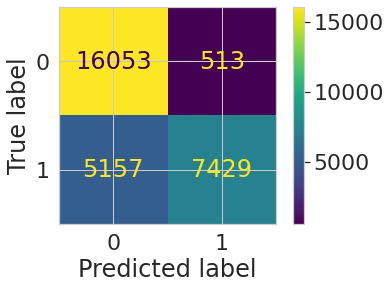

In [ ]:
print(metrics.plot_confusion_matrix(modelLGBM_tuned, df_validation_scaled_drop_pca, df_validation_label))

In [ ]:
print(metrics.classification_report(df_validation_label, validation_predict_lgbm_tuned))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     16566
           1       0.94      0.59      0.72     12586

    accuracy                           0.81     29152
   macro avg       0.85      0.78      0.79     29152
weighted avg       0.83      0.81      0.80     29152



# Prediction

In [ ]:
df_test_drop = df_test_scaled.drop(columns='transaction_recency_days')
df_test_pca = pca.transform(df_test_drop)

In [ ]:
predict_test = modelLGBM_pca.predict(df_test_pca)

In [ ]:
df_test_cust_id['is_churn']=predict_test

In [ ]:
df_test_cust_id

,customer_id,is_churn
0,3,1
1,18,1
2,20,0
3,24,1
4,28,0
...,...,...
18341,99976,0
18342,99986,0
18343,99987,1
18344,99988,1


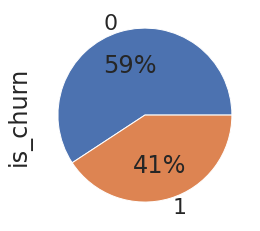

In [ ]:
df_test_cust_id['is_churn'].value_counts().plot(kind='pie', label= 'is_churn', autopct='%.0f%%')

In [ ]:
df_test_cust_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  18346 non-null  int64
 1   is_churn     18346 non-null  int64
dtypes: int64(2)
memory usage: 286.8 KB


In [ ]:
# df_test_cust_id.to_csv('/content/drive/MyDrive/Studi Independen/FP/df_final_predict', index=False)

In [ ]:
df_target = pd.read_csv('/content/drive/MyDrive/Studi Independen/FP/df_target.csv')

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  18346 non-null  int64
 1   is_churn     18346 non-null  int64
dtypes: int64(2)
memory usage: 286.8 KB


In [ ]:
df_target

,customer_id,is_churn
0,3,1
1,18,1
2,20,0
3,24,1
4,28,1
...,...,...
18341,99976,1
18342,99986,1
18343,99987,1
18344,99988,1


# Business Decision

For further EDA on business decision related, please visit this dataset: [Business Decission Notebook](https://bit.ly/PortugalFinalEDA)